In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pulp import *

In [2]:
# This is just for extending tables (as None we will see whole table)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 10)

# Read data

In [3]:
current_directory = os.getcwd()
file_name = "Case Study - distribution.xlsx"
file_path = os.path.join(current_directory, file_name)

In [5]:
file_path

'c:\\Users\\HP\\Desktop\\CV\\Deloitte\\Case Study - distribution.xlsx'

In [4]:
expedition = pd.read_excel(file_path, sheet_name = 'Expedition')
distance = pd.read_excel(file_path, sheet_name = 'Distance Matrix')
capacity = pd.read_excel(file_path, sheet_name = 'Expedition capacity')

In [5]:
expedition.isna().sum()

Expedition date      0
Material             0
Train/Truck          0
Weight[t]            0
Site               109
Customer             0
dtype: int64

109 customers that are not beeing delivered by neither Z1, Z2 or Z3

In [6]:
distance.isna().sum()

Customer         0
Site             0
Distance (km)    0
dtype: int64

ok

In [7]:
capacity.isna().sum()

Site                              0
Expedition Capacity (t / year)    0
dtype: int64

ok

# Expedition data

In [8]:
expedition.head()

,Expedition date,Material,Train/Truck,Weight[t],Site,Customer
0,2017-01-01 19:37:35,M1,Train,1239,Z1,81
1,2017-01-01 19:37:35,M1,Train,1568,Z1,81
2,2017-01-01 19:37:35,M1,Train,1492,Z2,50
3,2017-01-01 19:37:35,M1,Train,1479,Z2,26
4,2017-01-02 00:54:34,M1,Train,742,Z2,19


In [9]:
expedition.describe()

,Expedition date,Weight[t],Customer
count,74374,74374.000000,74374.000000
mean,2017-06-17 12:54:06.610576384,265.271842,33.311560
min,2017-01-01 19:37:35,0.000000,0.000000
25%,2017-03-16 01:04:17,71.000000,8.000000
50%,2017-06-09 23:36:34,168.000000,21.000000
75%,2017-09-13 14:02:20,353.000000,61.000000
max,2018-01-02 10:30:34,1840.000000,99.000000
std,NaN,290.737284,29.617312


In [10]:
expedition_mer = pd.merge(expedition, distance, on=['Customer', 'Site'], how = 'left')

In [11]:
expedition_mer.head()

,Expedition date,Material,Train/Truck,Weight[t],Site,Customer,Distance (km)
0,2017-01-01 19:37:35,M1,Train,1239,Z1,81,294.0
1,2017-01-01 19:37:35,M1,Train,1568,Z1,81,294.0
2,2017-01-01 19:37:35,M1,Train,1492,Z2,50,495.0
3,2017-01-01 19:37:35,M1,Train,1479,Z2,26,95.0
4,2017-01-02 00:54:34,M1,Train,742,Z2,19,139.0


In [12]:
expedition_n = expedition_mer[expedition_mer['Train/Truck'] == 'Train']
expedition_k = expedition_mer[expedition_mer['Train/Truck'] == 'Truck']

In [13]:
expedition_n.describe()

,Expedition date,Weight[t],Customer,Distance (km)
count,45170,45170.000000,45170.000000,45061.000000
mean,2017-06-13 09:14:52.816161024,273.054417,26.070755,262.073789
min,2017-01-01 19:37:35,0.000000,0.000000,0.000000
25%,2017-03-15 02:10:07,46.000000,5.000000,168.000000
50%,2017-06-06 09:27:58,126.000000,12.000000,274.000000
75%,2017-09-06 00:32:56,383.000000,36.000000,348.000000
max,2018-01-02 10:30:34,1840.000000,99.000000,499.000000
std,NaN,328.889672,29.520204,133.282249


In [14]:
expedition_k.describe()

,Expedition date,Weight[t],Customer,Distance (km)
count,29204,29204.000000,29204.000000,29204.000000
mean,2017-06-23 23:02:13.232057088,253.234488,44.510957,221.559307
min,2017-01-02 15:37:29,9.000000,0.000000,0.000000
25%,2017-03-17 16:04:24,118.000000,21.000000,115.000000
50%,2017-06-14 11:44:53,180.000000,47.000000,200.000000
75%,2017-10-02 13:23:58.500000,294.000000,65.000000,344.000000
max,2017-12-21 19:02:52,1627.000000,98.000000,499.000000
std,NaN,218.466291,26.068589,138.771401


In [15]:
expedition_zero = expedition[expedition['Weight[t]'] == 0]

In [16]:
len(expedition_zero)

810

We have 810 records of Train that shows nothing (weight = 0) delivered to Customer.

In [17]:
expedition.groupby('Customer').sum('Weight[t]')

,Weight[t]
Customer,
0,131374
1,1203094
2,658083
3,609377
4,537928
...,...
95,61859
96,35007
97,27477


In [18]:
expedition_capacity = expedition.groupby('Site').sum('Weight[t]')
expedition_capacity

,Weight[t],Customer
Site,,
Z1,2736861,327274
Z2,15174975,1787273
Z3,1792159,362384


In [19]:
capacity

,Site,Expedition Capacity (t / year)
0,Z1,5774700
1,Z2,15478400
2,Z3,5734900


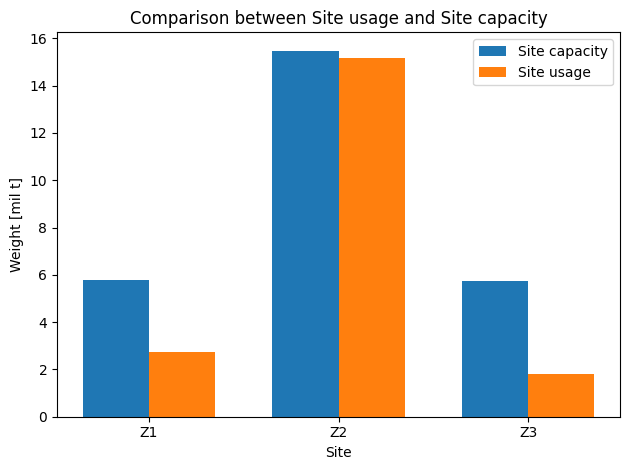

In [20]:
bar_width = 0.35

index = range(len(capacity['Site']))

plt.bar(index, capacity['Expedition Capacity (t / year)']/1000000, bar_width, label='Site capacity')
plt.bar([i + bar_width for i in index], expedition_capacity['Weight[t]']/1000000, bar_width, label='Site usage')

plt.xlabel('Site')
plt.ylabel('Weight [mil t]')
plt.title('Comparison between Site usage and Site capacity')
plt.xticks([i + bar_width / 2 for i in index], capacity['Site'])
plt.legend()

plt.tight_layout()
plt.show()

# Distance data

In [21]:
distance.head()

,Customer,Site,Distance (km)
0,81,Z1,294
1,50,Z1,271
2,26,Z1,447
3,19,Z1,488
4,8,Z1,163


In [22]:
distance.describe()

,Customer,Distance (km)
count,300.000000,300.000000
mean,49.500000,224.436667
std,28.914301,145.158681
min,0.000000,0.000000
25%,24.750000,103.000000
50%,49.500000,205.500000
75%,74.250000,347.250000
max,99.000000,499.000000


In [23]:
distance_pivot = distance.pivot_table(index='Customer', columns='Site', values='Distance (km)')
distance_pivot2 = distance.pivot_table(index='Site', columns='Customer', values='Distance (km)')

In [24]:
distance_pivot

Site,Z1,Z2,Z3
Customer,,,
0,103,237,17
1,171,416,211
2,274,30,14
3,494,309,5
4,224,225,426
...,...,...,...
95,314,416,6
96,194,6,4
97,321,137,129


In [25]:
distance_pivot2

Customer,0,1,2,3,4,...,95,96,97,98,99
Site,,,,,,,,,,,
Z1,103,171,274,494,224,...,314,194,321,277,203
Z2,237,416,30,309,225,...,416,6,137,407,230
Z3,17,211,14,5,426,...,6,4,129,146,158


# Capacity data

In [26]:
capacity

,Site,Expedition Capacity (t / year)
0,Z1,5774700
1,Z2,15478400
2,Z3,5734900


We can see, that size Z2 has 3 times bigger capacity, therefore it could provide to more customers.

# Total weight and travel distance:

In [27]:
expedition_mer

,Expedition date,Material,Train/Truck,Weight[t],Site,Customer,Distance (km)
0,2017-01-01 19:37:35,M1,Train,1239,Z1,81,294.0
1,2017-01-01 19:37:35,M1,Train,1568,Z1,81,294.0
2,2017-01-01 19:37:35,M1,Train,1492,Z2,50,495.0
3,2017-01-01 19:37:35,M1,Train,1479,Z2,26,95.0
4,2017-01-02 00:54:34,M1,Train,742,Z2,19,139.0
...,...,...,...,...,...,...,...
74369,2017-12-30 04:48:45,M1,Train,1413,Z2,14,209.0
74370,2017-12-30 07:22:07,M1,Train,315,Z2,23,344.0
74371,2017-12-30 07:22:07,M1,Train,315,Z2,23,344.0
74372,2017-12-30 07:22:07,M1,Train,315,Z2,23,344.0


In [28]:
Z_old = (expedition_mer['Distance (km)'] * expedition_mer['Weight[t]']).sum()
Z_old

4743953626.0

# Optimize delivery

In [29]:
# just to see data better
expedition_mer['Date'] = pd.to_datetime(expedition_mer['Expedition date']).dt.date

In [30]:
demand = expedition_mer[['Customer', 'Weight[t]']].groupby('Customer').sum('Weight[t]')
demand = demand.pivot_table(columns='Customer', values='Weight[t]')
demand = demand.to_dict(orient='list')
for key, value in demand.items():
    demand[key] = int(value[0])
demand

{0: 131374,
 1: 1203094,
 2: 658083,
 3: 609377,
 4: 537928,
 5: 498779,
 6: 366039,
 7: 374273,
 8: 490499,
 9: 399240,
 10: 294667,
 11: 850005,
 12: 370954,
 13: 190755,
 14: 304307,
 15: 213146,
 16: 187443,
 17: 271820,
 18: 247476,
 19: 352263,
 20: 287719,
 21: 218603,
 22: 189633,
 23: 441463,
 24: 335632,
 25: 292579,
 26: 508903,
 27: 89213,
 28: 178489,
 29: 68644,
 30: 149084,
 31: 116520,
 32: 65936,
 33: 130243,
 34: 57173,
 35: 133160,
 36: 59259,
 37: 58893,
 38: 52263,
 39: 140204,
 40: 399129,
 41: 127254,
 42: 76675,
 43: 46712,
 44: 46883,
 45: 174287,
 46: 63461,
 47: 74157,
 48: 69431,
 49: 86856,
 50: 257699,
 51: 380878,
 52: 54338,
 53: 85672,
 54: 94199,
 55: 66263,
 56: 52034,
 57: 93870,
 58: 47827,
 59: 71839,
 60: 86063,
 61: 220901,
 62: 262520,
 63: 155640,
 64: 139255,
 65: 331922,
 66: 75244,
 67: 142766,
 68: 171653,
 69: 217952,
 70: 275700,
 71: 129780,
 72: 65361,
 73: 137254,
 74: 346212,
 75: 179009,
 76: 141887,
 77: 110572,
 78: 278728,
 79: 10

In [31]:
supply = capacity.groupby('Site').sum()
supply = supply.pivot_table(columns='Site', values='Expedition Capacity (t / year)')
supply = supply.to_dict(orient='list')
for key, value in supply.items():
    supply[key] = int(value[0])
supply

{'Z1': 5774700, 'Z2': 15478400, 'Z3': 5734900}

In [32]:
cost = distance.groupby(['Site', 'Customer']).sum('Distance (km)')
cost = cost.pivot_table(columns=['Site', 'Customer'], values='Distance (km)')
cost = cost.to_dict(orient='list')
for key, value in cost.items():
    cost[key] = int(value[0])
cost

{('Z1', 0): 103,
 ('Z1', 1): 171,
 ('Z1', 2): 274,
 ('Z1', 3): 494,
 ('Z1', 4): 224,
 ('Z1', 5): 168,
 ('Z1', 6): 21,
 ('Z1', 7): 348,
 ('Z1', 8): 163,
 ('Z1', 9): 332,
 ('Z1', 10): 443,
 ('Z1', 11): 87,
 ('Z1', 12): 215,
 ('Z1', 13): 139,
 ('Z1', 14): 376,
 ('Z1', 15): 295,
 ('Z1', 16): 336,
 ('Z1', 17): 370,
 ('Z1', 18): 324,
 ('Z1', 19): 488,
 ('Z1', 20): 123,
 ('Z1', 21): 321,
 ('Z1', 22): 162,
 ('Z1', 23): 397,
 ('Z1', 24): 40,
 ('Z1', 25): 118,
 ('Z1', 26): 447,
 ('Z1', 27): 465,
 ('Z1', 28): 128,
 ('Z1', 29): 216,
 ('Z1', 30): 2,
 ('Z1', 31): 27,
 ('Z1', 32): 341,
 ('Z1', 33): 38,
 ('Z1', 34): 185,
 ('Z1', 35): 363,
 ('Z1', 36): 144,
 ('Z1', 37): 408,
 ('Z1', 38): 357,
 ('Z1', 39): 439,
 ('Z1', 40): 69,
 ('Z1', 41): 206,
 ('Z1', 42): 269,
 ('Z1', 43): 363,
 ('Z1', 44): 181,
 ('Z1', 45): 407,
 ('Z1', 46): 243,
 ('Z1', 47): 95,
 ('Z1', 48): 401,
 ('Z1', 49): 101,
 ('Z1', 50): 271,
 ('Z1', 51): 345,
 ('Z1', 52): 152,
 ('Z1', 53): 130,
 ('Z1', 54): 338,
 ('Z1', 55): 120,
 ('Z1', 56)

# Weight times distance to minimize

In [33]:
# Initialize the problem
prob = LpProblem("Transportation_Problem", LpMinimize)

# Define decision variables
x = LpVariable.dicts("shipment", [(i, j) for i in supply.keys() for j in demand.keys()], 0)

# Define objective function
prob += lpSum(cost[i, j] * x[(i, j)] for i in supply.keys() for j in demand.keys())

# Define constraints
for i in supply.keys():
    prob += lpSum(x[(i, j)] for j in demand.keys()) <= supply[i]
for j in demand.keys():
    prob += lpSum(x[(i, j)] for i in supply.keys()) == demand[j]

# Solve the problem
prob.solve()

1

In [34]:
print("Optimal Solution:")
for v in prob.variables():
    print(v.name, "=", v.varValue)

Optimal Solution:
shipment_('Z1',_0) = 0.0
shipment_('Z1',_1) = 1203094.0
shipment_('Z1',_10) = 0.0
shipment_('Z1',_11) = 850005.0
shipment_('Z1',_12) = 0.0
shipment_('Z1',_13) = 0.0
shipment_('Z1',_14) = 0.0
shipment_('Z1',_15) = 0.0
shipment_('Z1',_16) = 0.0
shipment_('Z1',_17) = 0.0
shipment_('Z1',_18) = 0.0
shipment_('Z1',_19) = 0.0
shipment_('Z1',_2) = 0.0
shipment_('Z1',_20) = 287719.0
shipment_('Z1',_21) = 218603.0
shipment_('Z1',_22) = 0.0
shipment_('Z1',_23) = 0.0
shipment_('Z1',_24) = 335632.0
shipment_('Z1',_25) = 292579.0
shipment_('Z1',_26) = 0.0
shipment_('Z1',_27) = 0.0
shipment_('Z1',_28) = 0.0
shipment_('Z1',_29) = 0.0
shipment_('Z1',_3) = 0.0
shipment_('Z1',_30) = 149084.0
shipment_('Z1',_31) = 116520.0
shipment_('Z1',_32) = 0.0
shipment_('Z1',_33) = 0.0
shipment_('Z1',_34) = 0.0
shipment_('Z1',_35) = 0.0
shipment_('Z1',_36) = 59259.0
shipment_('Z1',_37) = 0.0
shipment_('Z1',_38) = 0.0
shipment_('Z1',_39) = 0.0
shipment_('Z1',_4) = 0.0
shipment_('Z1',_40) = 399129.0
s

In [35]:
Z_new = prob.objective.value()
print("Total transported ton per kilometer of minimized transportation:", Z_new, 'ton/km')

Total transported ton per kilometer of minimized transportation: 2191352238.0 ton/km


In [36]:
print("Total transported ton per kilometer of expeditions used:", Z_old, 'ton/km')

Total transported ton per kilometer of expeditions used: 4743953626.0 ton/km


In [37]:
print("Decrease of costs ton/km:", round((1 - Z_new/Z_old)*100), "%")

Decrease of costs ton/km: 54 %


In [38]:
Z1_var = prob.variables()[  0:100]
Z2_var = prob.variables()[100:200]
Z3_var = prob.variables()[200:300]

In [39]:
sum1 = 0
for v in Z1_var:
    sum1 += v.varValue
print("Site Z1 new capacity:", sum1, '[t]')

Site Z1 new capacity: 5774700.0 [t]


In [40]:
sum2 = 0
for v in Z2_var:
    sum2 += v.varValue
print("Site Z2 new capacity:", sum2, '[t]')

Site Z2 new capacity: 8219728.0 [t]


In [41]:
sum3 = 0
for v in Z3_var:
    sum3 += v.varValue
print("Site Z3 new capacity:", sum3, '[t]')

Site Z3 new capacity: 5734900.0 [t]


In [42]:
new_sites = [['Z1', sum1], ['Z2', sum2], ['Z3', sum3]]
new_sites = pd.DataFrame(new_sites, columns=['Site', 'New Capacity'])
new_sites

,Site,New Capacity
0,Z1,5774700.0
1,Z2,8219728.0
2,Z3,5734900.0


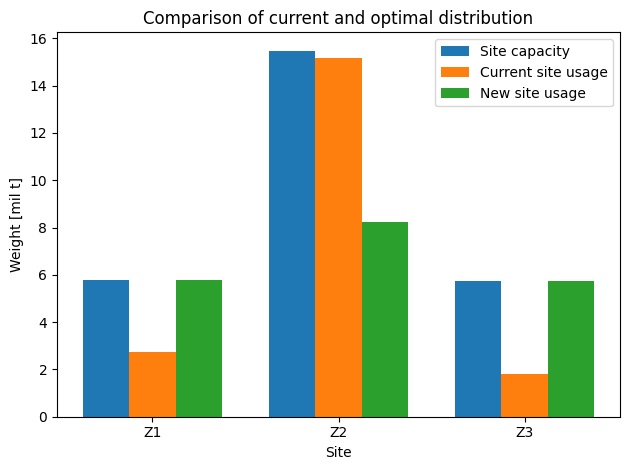

In [43]:
bar_width = 0.25

index = range(len(capacity['Site']))

# divided by 1000000 for better look
plt.bar(index, capacity['Expedition Capacity (t / year)']/1000000, bar_width, label='Site capacity')
plt.bar([i + bar_width for i in index], expedition_capacity['Weight[t]']/1000000, bar_width, label='Current site usage')
plt.bar([i + bar_width*2 for i in index], new_sites['New Capacity']/1000000, bar_width, label='New site usage')

plt.xlabel('Site')
plt.ylabel('Weight [mil t]')
plt.title('Comparison of current and optimal distribution')
plt.xticks([i + bar_width / 1 for i in index], capacity['Site'])
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
expedition_capacity

,Weight[t],Customer
Site,,
Z1,2736861,327274
Z2,15174975,1787273
Z3,1792159,362384


# Further analysis

In [45]:
expedition_mer

,Expedition date,Material,Train/Truck,Weight[t],Site,Customer,Distance (km),Date
0,2017-01-01 19:37:35,M1,Train,1239,Z1,81,294.0,2017-01-01
1,2017-01-01 19:37:35,M1,Train,1568,Z1,81,294.0,2017-01-01
2,2017-01-01 19:37:35,M1,Train,1492,Z2,50,495.0,2017-01-01
3,2017-01-01 19:37:35,M1,Train,1479,Z2,26,95.0,2017-01-01
4,2017-01-02 00:54:34,M1,Train,742,Z2,19,139.0,2017-01-02
...,...,...,...,...,...,...,...,...
74369,2017-12-30 04:48:45,M1,Train,1413,Z2,14,209.0,2017-12-30
74370,2017-12-30 07:22:07,M1,Train,315,Z2,23,344.0,2017-12-30
74371,2017-12-30 07:22:07,M1,Train,315,Z2,23,344.0,2017-12-30
74372,2017-12-30 07:22:07,M1,Train,315,Z2,23,344.0,2017-12-30


In [46]:
# Example Customer = 50
distance_pivot.iloc[50]

Site
Z1    271
Z2    495
Z3    365
Name: 50, dtype: int64

### Prefered routes and export

In [47]:
output_data = []
print("Preferred routes given as: (site, _customer):")
for v in prob.variables():
    if (v.varValue > 0):
        output_data.append([v.name, v.varValue])
        print(v.name, "=", v.varValue)

Preferred routes given as: (site, _customer):
shipment_('Z1',_1) = 1203094.0
shipment_('Z1',_11) = 850005.0
shipment_('Z1',_20) = 287719.0
shipment_('Z1',_21) = 218603.0
shipment_('Z1',_24) = 335632.0
shipment_('Z1',_25) = 292579.0
shipment_('Z1',_30) = 149084.0
shipment_('Z1',_31) = 116520.0
shipment_('Z1',_36) = 59259.0
shipment_('Z1',_40) = 399129.0
shipment_('Z1',_5) = 41541.0
shipment_('Z1',_50) = 257699.0
shipment_('Z1',_55) = 66263.0
shipment_('Z1',_56) = 52034.0
shipment_('Z1',_6) = 366039.0
shipment_('Z1',_64) = 139255.0
shipment_('Z1',_79) = 106464.0
shipment_('Z1',_8) = 490499.0
shipment_('Z1',_83) = 82451.0
shipment_('Z1',_84) = 94436.0
shipment_('Z1',_85) = 70123.0
shipment_('Z1',_88) = 96272.0
shipment_('Z2',_10) = 294667.0
shipment_('Z2',_13) = 190755.0
shipment_('Z2',_14) = 304307.0
shipment_('Z2',_15) = 213146.0
shipment_('Z2',_16) = 187443.0
shipment_('Z2',_19) = 352263.0
shipment_('Z2',_2) = 658083.0
shipment_('Z2',_23) = 441463.0
shipment_('Z2',_26) = 508903.0
shipm

In [48]:
df = pd.DataFrame(output_data, columns=['From_To','Weights'])

file_name = "Optimal_deliveries.xlsx"
file_path_out = os.path.join(current_directory, file_name)
df.to_excel(file_path_out, index=False, columns=['From_To', 'Weights'])
print("Output saved to", file_path_out)

Output saved to c:\Users\HP\Desktop\CV\Deloitte\Optimal_deliveries.xlsx
